In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy 
import timeit

In [3]:
def load_image(path_input):
    img = cv2.imread(path_input)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [5]:
path_image = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P2/dr_trump.jpg'

image = load_image(path_image)

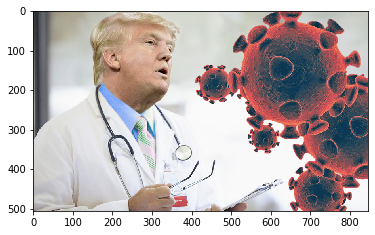

In [7]:
pixels = np.array(image)
pixels_gray = copy.deepcopy(pixels) 
pixels_cmyk = copy.deepcopy(pixels) 
pixels_yuv = copy.deepcopy(pixels) 
pixels_hsv = copy.deepcopy(pixels)
pixels_hsl = copy.deepcopy(pixels)

plt.imshow(pixels)
plt.show()

# gray Image

Time grayScale:  0.015957600000000127


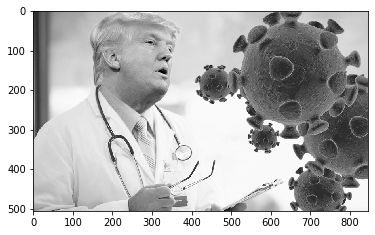

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def grayScale(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

grayimg = pixels_gray
height, width, channels = pixels.shape
start = timeit.default_timer()
grayimg = grayScale(pixels_gray)  

stop = timeit.default_timer()

print('Time grayScale: ', stop - start)    
 
plt.imshow(grayimg, cmap=plt.get_cmap('gray'))
plt.show()

# CMYK Image

In [9]:
rgb_scale = 255
cmyk_scale = 100

def CMYK(pixel):
    r,g,b = cv2.split(pixel)
    
    r_hat = np.true_divide(r,rgb_scale)
    g_hat = np.true_divide(g,rgb_scale)
    b_hat = np.true_divide(b,rgb_scale)
    
    maxRG = np.maximum(r_hat,g_hat)
    totalMax = np.maximum(maxRG,b_hat)
    
    K = np.subtract(1,totalMax)
    i , j, t = np.subtract(1,r_hat), np.subtract(1,g_hat), np.subtract(1,b_hat)
    C = (np.subtract(i,K))/np.subtract(1,K)
    M = (np.subtract(j,K))/np.subtract(1,K)
    Y = (np.subtract(t,K))/np.subtract(1,K)
    return C,M,Y,K

Time CMYK:  0.018459100000001172


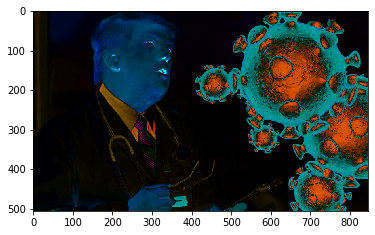

In [10]:
height, width, channels = pixels.shape
start = timeit.default_timer()
c,m,y,k = CMYK(pixels_cmyk)

stop = timeit.default_timer()
print('Time CMYK: ', stop - start)   

img_cmyk = cv2.merge((c,m,y))
plt.imshow(img_cmyk)
plt.show()

# YUV Image

In [11]:
def YUV(rgb):
    b,g,r = cv2.split(rgb)
    K = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    Y = np.add((np.matrix.round(np.dot(0.859,K))),16)
    U = np.add(np.matrix.round(np.dot(0.496,np.subtract(b,K))),128)
    V = np.add(np.matrix.round(np.dot(0.627,np.subtract(r,K))),128)
    return Y,U,V

Time YUV:  0.02800839999999738


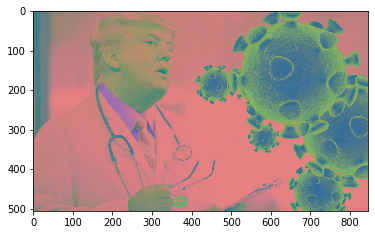

In [12]:
start = timeit.default_timer()
y,u,v = YUV(pixels_yuv)
stop = timeit.default_timer()
print('Time YUV: ', stop - start)   

img_cmyk = cv2.merge((y,u,v))
plt.imshow(img_cmyk.astype(np.uint8))
plt.show()

# HSV Image

In [13]:
def HSV(rgb):
    b,g,r = cv2.split(pixel)
    
    r_hat = np.true_divide(r,rgb_scale)
    g_hat = np.true_divide(g,rgb_scale)
    b_hat = np.true_divide(b,rgb_scale)
    
    maxRG = np.maximum(r_hat,g_hat)
    Cmax = np.maximum(maxRG,b_hat)
    
    minRG = np.minimum(r_hat,g_hat)
    Cmin = np.minimum(minRG,b_hat)
    
    delta = np.subtract(Cmax,Cmin)
    
    if delta == 0:
        H = 0
    elif Cmax == r_hat :
        H = 60 * (((g_hat - b_hat)/delta) % 6)
    elif Cmax == g_hat:
        H = 60 * (((b_hat - r_hat)/delta) + 2)
    elif Cmax == b_hat:
        H = 60 * (((r_hat - g_hat)/delta) + 4)
        
    if Cmax == 0:
        S = 0
    else :
        S = delta / Cmax
        
    V = Cmax 

    return H, S, V

Time HSV:  0.08679530000000568


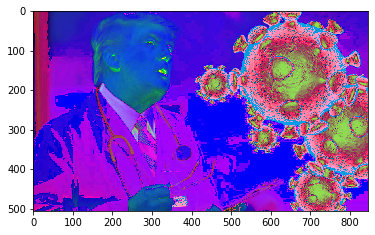

In [14]:
from skimage.color import rgb2hsv
start = timeit.default_timer()
hsv_img = rgb2hsv(pixels_hsv)
stop = timeit.default_timer()
print('Time HSV: ', stop - start)   

HUE = hsv_img[:, :, 0]
SAT = hsv_img[:, :, 1]
VAL = hsv_img[:, :, 2]
plt.imshow(hsv_img)
plt.show()

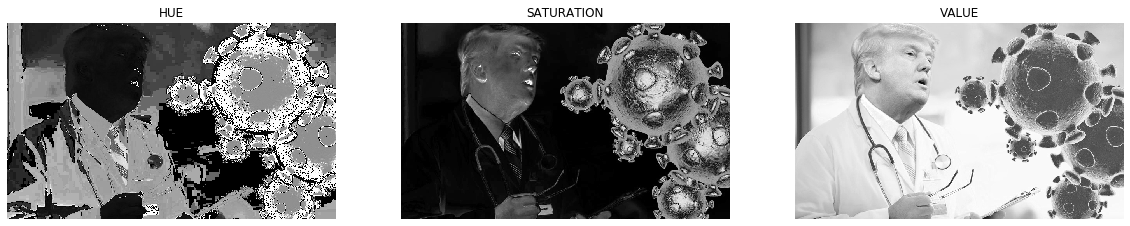

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)              # Plot color attributes
plt.imshow(HUE, cmap='gray')
plt.title('HUE')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT, cmap='gray')
plt.title('SATURATION')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(VAL, cmap='gray')
plt.title('VALUE')
plt.axis('off')
plt.show()

# HSL

In [16]:
def np_rgb2hls(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    maxc = np.max(img, -1)
    minc = np.min(img, -1)
    l = (minc + maxc) / 2.0
    if np.array_equal(minc, maxc):
        return np.zeros_like(l), l, np.zeros_like(l)
    smask = np.greater(l, 0.5).astype(np.float32)

    s = (1.0 - smask) * ((maxc - minc) / (maxc + minc)) + smask * ((maxc - minc) / (2.001 - maxc - minc))
    rc = (maxc - r) / (maxc - minc + 0.001)
    gc = (maxc - g) / (maxc - minc + 0.001)
    bc = (maxc - b) / (maxc - minc + 0.001)

    rmask = np.equal(r, maxc).astype(np.float32)
    gmask = np.equal(g, maxc).astype(np.float32)
    rgmask = np.logical_or(rmask, gmask).astype(np.float32)

    h = rmask * (bc - gc) + gmask * (2.0 + rc - bc) + (1.0 - rgmask) * (4.0 + gc - rc)
    h = np.remainder(h / 6.0, 1.0)
    return h, l, s

In [17]:
start = timeit.default_timer()
h,l,s = np_rgb2hls(pixels_hsl)
stop = timeit.default_timer()
print('Time HSL: ', stop - start)   


Time HSL:  0.04335810000000606


C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


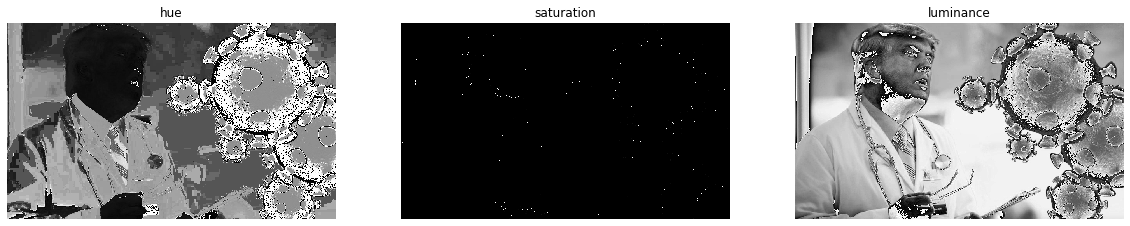

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)              # Plot color attributes
plt.imshow(h, cmap='gray')
plt.title('hue')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')
plt.title('saturation')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(l, cmap='gray')
plt.title('luminance')
plt.axis('off')
plt.show()